In [1]:
import zipfile
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

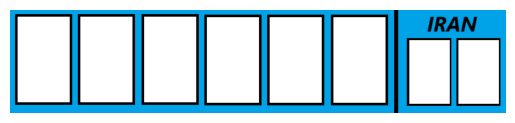

In [6]:
# Ekstrak file ZIP
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    # Dapatkan daftar nama file di dalam ZIP
    image_files = [f for f in zip_ref.namelist() if f.endswith(('.png', '.jpg', '.jpeg'))]

    images = []

    for image_file in image_files:
        # Membaca file gambar langsung dari ZIP
        with zip_ref.open(image_file) as img_file:
            img = Image.open(img_file)
            images.append(np.array(img))  # Mengubah gambar menjadi array NumPy

# Contoh untuk menampilkan gambar pertama
plt.imshow(images[0])
plt.axis('off')  # Menyembunyikan axis
plt.show()


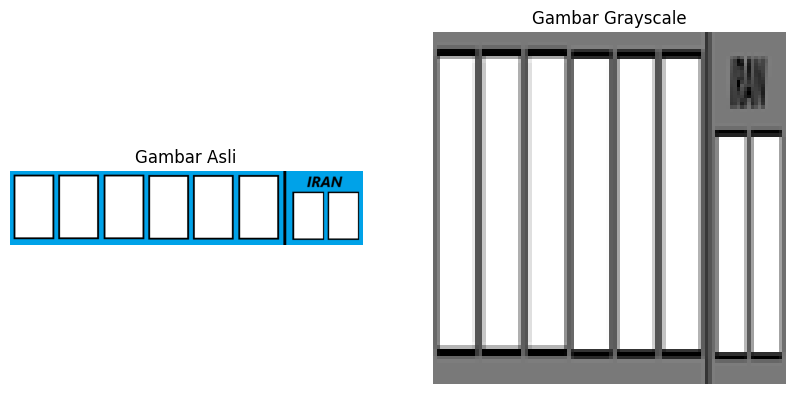

In [8]:
# Memproses gambar (contoh: mengubah ukuran dan konversi ke grayscale)
processed_images = []

for img in images:
    # Mengubah ukuran gambar
    resized_img = Image.fromarray(img).resize((100, 100))  # Mengubah ukuran menjadi 100x100
    # Mengonversi ke grayscale
    gray_img = resized_img.convert('L')
    processed_images.append(np.array(gray_img))

# Menampilkan gambar pertama yang telah diproses
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.title('Gambar Asli')
plt.axis('off')

# Gambar yang telah diproses (grayscale)
plt.subplot(1, 2, 2)
plt.imshow(processed_images[0], cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

plt.show()

Gambar yang telah diproses disimpan di processed_images/


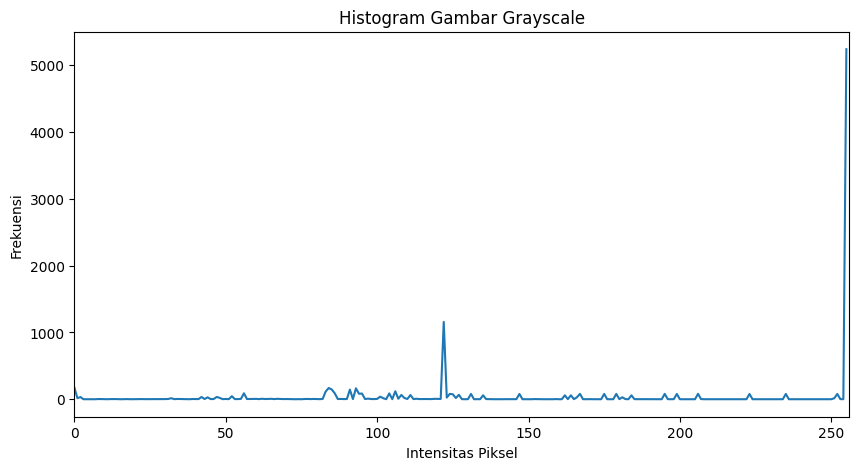

In [9]:
# Proses gambar (ubah ukuran dan konversi ke grayscale)
processed_images = []
for img in images:
    resized_img = Image.fromarray(img).resize((100, 100))  # Mengubah ukuran menjadi 100x100
    gray_img = resized_img.convert('L')  # Mengonversi ke grayscale
    processed_images.append(np.array(gray_img))

# Menyimpan gambar yang telah diproses
output_folder = 'processed_images/'
os.makedirs(output_folder, exist_ok=True)

for i, img in enumerate(processed_images):
    output_path = os.path.join(output_folder, f'processed_image_{i}.png')
    Image.fromarray(img).save(output_path)

print(f"Gambar yang telah diproses disimpan di {output_folder}")

# Menganalisis gambar (contoh: menghitung histogram)
# Menghitung histogram untuk gambar grayscale pertama
histogram, bins = np.histogram(processed_images[0], bins=256, range=(0, 256))

# Menampilkan histogram
plt.figure(figsize=(10, 5))
plt.title('Histogram Gambar Grayscale')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.xlim([0, 256])
plt.plot(histogram)
plt.show()

Rata-rata intensitas piksel untuk setiap gambar:
Gambar 0: 189.6536
Gambar 1: 126.9207
Gambar 2: 98.6153
Gambar 3: 56.7411
Gambar 4: 98.6153
Gambar 5: 107.8893
Gambar 6: 123.9464
Gambar 7: 130.4902
Gambar 8: 106.7729
Gambar 9: 109.9246
Gambar 10: 109.2948
Gambar 11: 91.8048
Gambar 12: 99.6176
Gambar 13: 98.407
Gambar 14: 87.6122
Gambar 15: 136.2429
Gambar 16: 114.629
Gambar 17: 122.4796
Gambar 18: 114.2385
Gambar 19: 124.8295
Gambar 20: 125.7518
Gambar 21: 109.6685
Gambar 22: 128.9321
Gambar 23: 134.7156
Gambar 24: 126.7287
Gambar 25: 111.1298
Gambar 26: 145.3848
Gambar 27: 128.6806
Gambar 28: 126.9207
Gambar 29: 129.9472
Gambar 30: 133.5664
Gambar 31: 103.5926
Gambar 32: 121.75
Gambar 33: 112.6266
Gambar 34: 90.8056
Gambar 35: 95.5033
Gambar 36: 78.2259
Gambar 37: 68.3679
Gambar 38: 91.3258
Gambar 39: 97.9283
Gambar 40: 83.6501
Gambar 41: 85.5997
Gambar 42: 79.0438
Gambar 43: 84.7643
Gambar 44: 81.7574
Gambar 45: 105.8992
Gambar 46: 80.3247
Gambar 47: 92.1985
Gambar 48: 72.4001
Gambar

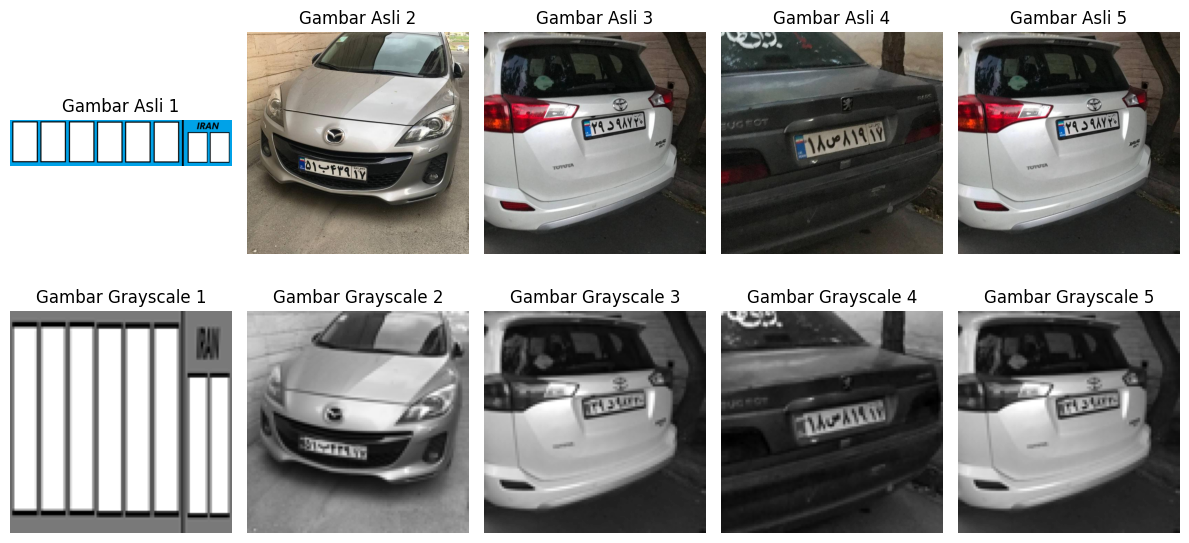

Hasil analisis disimpan ke 'hasil_analisis.txt'


In [10]:
# Melakukan analisis lebih lanjut (contoh: menghitung rata-rata intensitas piksel)
average_intensities = [np.mean(img) for img in processed_images]
print("Rata-rata intensitas piksel untuk setiap gambar:")
for i, avg in enumerate(average_intensities):
    print(f"Gambar {i}: {avg}")

# Prediksi Menggunakan Model (jika ada)
# Uncomment jika Anda memiliki model yang telah dilatih
# with open('path/to/your/model.pkl', 'rb') as model_file:
#     model = pickle.load(model_file)

# Melakukan prediksi untuk gambar pertama
# processed_image_array = processed_images[0].reshape(1, 100, 100, 1)  # Menyesuaikan shape
# predictions = model.predict(processed_image_array)
# print("Prediksi untuk gambar pertama:", predictions)

# Visualisasi beberapa gambar asli dan hasil proses
plt.figure(figsize=(12, 6))

for i in range(min(5, len(images))):  # Tampilkan hingga 5 gambar
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Gambar Asli {i+1}')
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Gambar Grayscale {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Menyimpan hasil analisis ke file
with open('hasil_analisis.txt', 'w') as f:
    f.write("Rata-rata intensitas piksel untuk setiap gambar:\n")
    for i, avg in enumerate(average_intensities):
        f.write(f"Gambar {i}: {avg}\n")

print("Hasil analisis disimpan ke 'hasil_analisis.txt'")


In [16]:
import sqlite3

# Membuat atau menghubungkan ke database
conn = sqlite3.connect('analisis_gambar.db')
c = conn.cursor()

# Membuat tabel jika belum ada
c.execute('''
    CREATE TABLE IF NOT EXISTS analisis (
        id INTEGER PRIMARY KEY,
        rata_rata REAL
    )
''')

# Menyimpan rata-rata intensitas ke dalam database
for avg in average_intensities:
    c.execute('INSERT INTO analisis (rata_rata) VALUES (?)', (avg,))

# Menyimpan perubahan dan menutup koneksi
conn.commit()
conn.close()
print("Hasil analisis disimpan ke database 'analisis_gambar.db'")


Hasil analisis disimpan ke database 'analisis_gambar.db'


In [19]:
# Menghitung prediksi untuk semua gambar
predicted_labels = [np.argmax(model.predict(img.reshape(1, 100, 100, 1))) for img in processed_images]

# Jika Anda memiliki label yang sesuai
true_labels = [0, 1, 0, 1]  # Ganti dengan label yang sesuai untuk setiap gambar

# Mencetak laporan klasifikasi
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_labels, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(true_labels, predicted_labels))


NameError: name 'model' is not defined

In [21]:
model = load_model('C:\Users\alyss\Downloads\archive.zip\Persian_Car_Plates_YOLOV8\analisis_gambar.db')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-21-0847cee9d270>, line 1)